In [50]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = [i for i in doc.lower().split() if i not in stop]
    punc_free = [ch for ch in stop_free if ch not in exclude]
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free)
    return normalized

 

In [51]:
exclude

{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~'}

In [52]:
doc1 = "Sugar is bad to consume. My sister likes to have sugar, but not my father."
doc2 = "My father spends a lot of time driving my sister around to dance practice."
doc3 = "Doctors suggest that driving may cause increased stress and blood pressure."
doc4 = "Sometimes I feel pressure to perform well at school, but my father never seems to drive my sister to do better."
doc5 = "Health experts say that Sugar is not good for your lifestyle."

# compile documents
doc_complete = [doc1, doc2, doc3, doc4, doc5]

In [53]:
doc_clean = [clean(doc).split() for doc in doc_complete]

In [54]:
doc_clean

[['sugar', 'bad', 'consume.', 'sister', 'like', 'sugar,', 'father.'],
 ['father',
  'spends',
  'lot',
  'time',
  'driving',
  'sister',
  'around',
  'dance',
  'practice.'],
 ['doctor',
  'suggest',
  'driving',
  'may',
  'cause',
  'increased',
  'stress',
  'blood',
  'pressure.'],
 ['sometimes',
  'feel',
  'pressure',
  'perform',
  'well',
  'school,',
  'father',
  'never',
  'seems',
  'drive',
  'sister',
  'better.'],
 ['health', 'expert', 'say', 'sugar', 'good', 'lifestyle.']]

In [59]:
import gensim
from gensim import corpora
from gensim.corpora import Dictionary
#dct=Dictionary()
# Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
dictionary = corpora.Dictionary(doc_clean)
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

In [57]:
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=3, id2word = dictionary, passes=50)

In [58]:
print(ldamodel.print_topics(num_topics=3, num_words=3))

[(0, '0.067*"sugar" + 0.038*"pressure." + 0.038*"may"'), (1, '0.062*"sister" + 0.062*"driving" + 0.061*"father"'), (2, '0.054*"sister" + 0.054*"father" + 0.054*"well"')]


C:\Users\603766\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


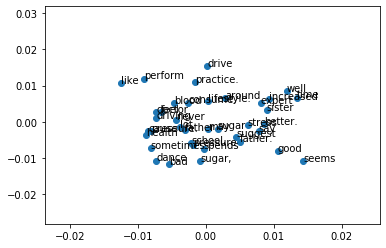

In [71]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
model = Word2Vec(doc_clean, min_count=1)
# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()


  

In [76]:

for i in doc_clean:
    for j in i:
        for k in i:
           print(model.similarity(k,j))

1.0
-0.07848618
0.0397626
0.13693783
-0.08245368
-0.024470069
0.007475771
-0.07848618
1.0
0.03681372
-0.14902106
0.014462173
0.053124648
0.1257826
0.0397626
0.03681372
1.0
-0.1961162
0.18226568
-0.06505745
-0.09931828
0.13693783
-0.14902106
-0.1961162
1.0
0.03534671
0.08606427
0.08225896
-0.08245368
0.014462173
0.18226568
0.03534671
1.0
-0.07535544
0.029892065
-0.024470069
0.053124648
-0.06505745
0.08606427
-0.07535544
1.0
-0.010774968
0.007475771
0.1257826
-0.09931828
0.08225896
0.029892065
-0.010774968
1.0
1.0
0.007984191
-0.053082705
-0.17741689
-0.066878006
-0.07343332
0.014809437
-0.002591744
-0.11433172
0.007984191
1.0
-0.100355476
-0.02537492
0.00472402
0.11612846
0.03484327
0.14239839
-0.01524467
-0.053082705
-0.100355476
1.0
-0.01760729
0.01526219
-0.0045123175
-0.07933391
0.016111672
-0.090182245
-0.17741689
-0.02537492
-0.01760729
0.99999994
-0.07212204
0.07167637
0.08649161
-0.1256095
0.00681876
-0.066878006
0.00472402
0.01526219
-0.07212204
1.0
-0.031780075
-0.086947426
-0

C:\Users\603766\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  after removing the cwd from sys.path.
